In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Baffin = pd.read_excel(filepath, sheet_name='Baffin-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Baffin)
fp.date_time(Baffin)

,Extent,Date
0,1090625.815,1979-01-01
1,1157634.866,1979-02-01
2,1299583.477,1979-03-01
3,1137194.680,1979-04-01
4,983083.453,1979-05-01
...,...,...
533,781460.891,2023-06-01
534,331845.048,2023-07-01
535,99334.625,2023-08-01
536,49359.723,2023-09-01


In [5]:
scaler = MinMaxScaler()
Baffin['Extent'] = scaler.fit_transform(Baffin['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 2
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Baffin['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((525, 12, 1), (525,))

In [9]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [10]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [11]:
cp = ModelCheckpoint('Baffin_model_LT2/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [12]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
45/53 [========================>.....] - ETA: 0s - loss: 0.2345 - root_mean_squared_error: 0.4843

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 9s 110ms/step - loss: 0.2297 - root_mean_squared_error: 0.4793 - val_loss: 0.2331 - val_root_mean_squared_error: 0.4828
Epoch 2/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1843 - root_mean_squared_error: 0.4293

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.1811 - root_mean_squared_error: 0.4256 - val_loss: 0.1962 - val_root_mean_squared_error: 0.4429
Epoch 3/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1415 - root_mean_squared_error: 0.3762

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.1396 - root_mean_squared_error: 0.3736 - val_loss: 0.1639 - val_root_mean_squared_error: 0.4048
Epoch 4/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1086 - root_mean_squared_error: 0.3296

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 102ms/step - loss: 0.1084 - root_mean_squared_error: 0.3292 - val_loss: 0.1328 - val_root_mean_squared_error: 0.3644
Epoch 5/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0871 - root_mean_squared_error: 0.2952

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.0866 - root_mean_squared_error: 0.2944 - val_loss: 0.1065 - val_root_mean_squared_error: 0.3264
Epoch 6/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0685 - root_mean_squared_error: 0.2618

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 105ms/step - loss: 0.0683 - root_mean_squared_error: 0.2612 - val_loss: 0.0854 - val_root_mean_squared_error: 0.2922
Epoch 7/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0477 - root_mean_squared_error: 0.2185

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0509 - root_mean_squared_error: 0.2255 - val_loss: 0.0697 - val_root_mean_squared_error: 0.2640
Epoch 8/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0381 - root_mean_squared_error: 0.1953

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0393 - root_mean_squared_error: 0.1981 - val_loss: 0.0554 - val_root_mean_squared_error: 0.2353
Epoch 9/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0273 - root_mean_squared_error: 0.1651

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 105ms/step - loss: 0.0287 - root_mean_squared_error: 0.1694 - val_loss: 0.0413 - val_root_mean_squared_error: 0.2033
Epoch 10/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0283 - root_mean_squared_error: 0.1682

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0270 - root_mean_squared_error: 0.1642 - val_loss: 0.0312 - val_root_mean_squared_error: 0.1766
Epoch 11/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0185 - root_mean_squared_error: 0.1360

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.0183 - root_mean_squared_error: 0.1351 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1420
Epoch 12/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0164 - root_mean_squared_error: 0.1280

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 103ms/step - loss: 0.0160 - root_mean_squared_error: 0.1265 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1131
Epoch 13/50
53/53 [==============================] - ETA: 0s - loss: 0.0169 - root_mean_squared_error: 0.1299

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.0169 - root_mean_squared_error: 0.1299 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0857
Epoch 14/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0152 - root_mean_squared_error: 0.1231

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0145 - root_mean_squared_error: 0.1202 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0724
Epoch 15/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0161 - root_mean_squared_error: 0.1269

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 6s 109ms/step - loss: 0.0156 - root_mean_squared_error: 0.1251 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0687
Epoch 16/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.1211

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0152 - root_mean_squared_error: 0.1233 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0544
Epoch 17/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0141 - root_mean_squared_error: 0.1188 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0648
Epoch 18/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0158 - root_mean_squared_error: 0.1256

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0153 - root_mean_squared_error: 0.1236 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0518
Epoch 19/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0116 - root_mean_squared_error: 0.1079 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0567
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0527
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0138 - root_mean_squared_error: 0.1175 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0684
Epoch 22/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0118 - root_mean_squared_error: 0.1087 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0522
Epoch 23/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0151 - root_mean_squared_error: 0.1228 - val_loss: 0.0039 - val_root_mean_squared

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.0101 - root_mean_squared_error: 0.1003 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0500
Epoch 27/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0535
Epoch 28/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0117 - root_mean_squared_error: 0.1079 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1122
Epoch 29/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0131 - root_mean_squared_error: 0.1143 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0508
Epoch 30/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1125

INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


INFO:tensorflow:Assets written to: Baffin_model_LT2\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0133 - root_mean_squared_error: 0.1153 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0498
Epoch 31/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0099 - root_mean_squared_error: 0.0993 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0576
Epoch 32/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0146 - root_mean_squared_error: 0.1209 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0628
Epoch 33/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0109 - root_mean_squared_error: 0.1042 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0588
Epoch 34/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0134 - root_mean_squared_error: 0.1156 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0512
Epoch 35/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0126 - root_mean_squared_error: 0.1121 - val_loss: 0.0025 - val_root_mean_squared

In [13]:
time = (etime - stime)/60
print(f'{time} minutes')

1.9169922471046448 minutes


In [14]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

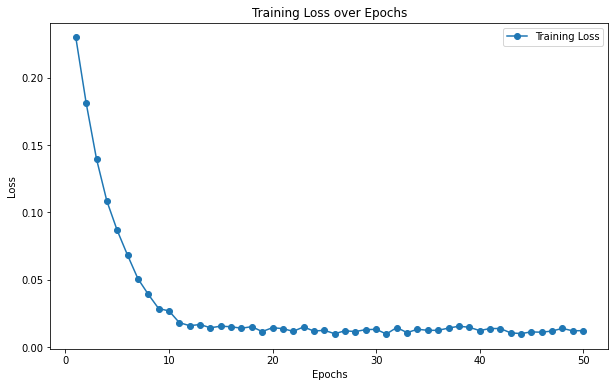

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

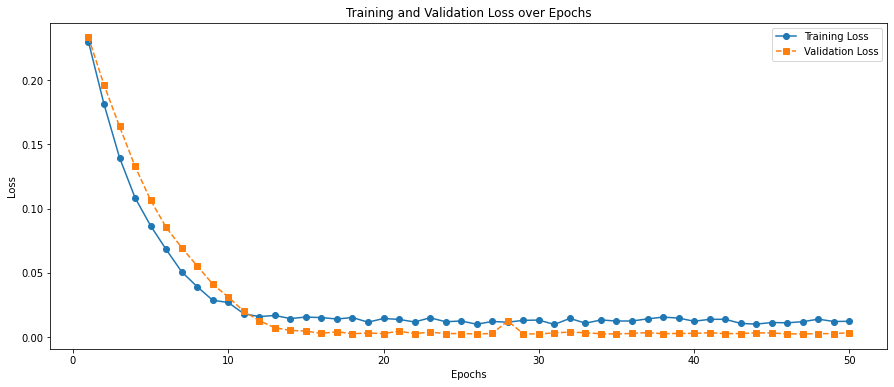

In [16]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [17]:
from tensorflow.keras.models import load_model
model1 = load_model('Baffin_model_LT2/')

In [18]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [19]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

RMSE : 0.06196030247747177


In [20]:
mae = mean_absolute_error(y_test, test_predictions)
print(mae)

0.04762337742951291


In [21]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

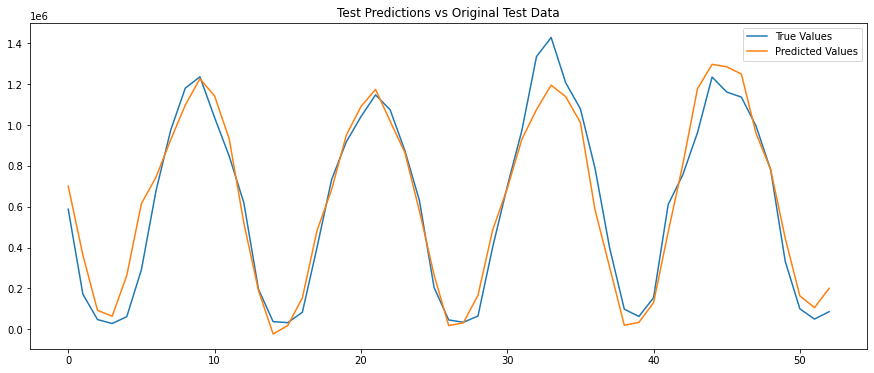

In [24]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

Prediction on whole dataset

In [28]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [29]:
mse = mean_squared_error(y, predictions)
print(mse)

0.0031807445298732543


In [30]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.04459549529640277


In [31]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

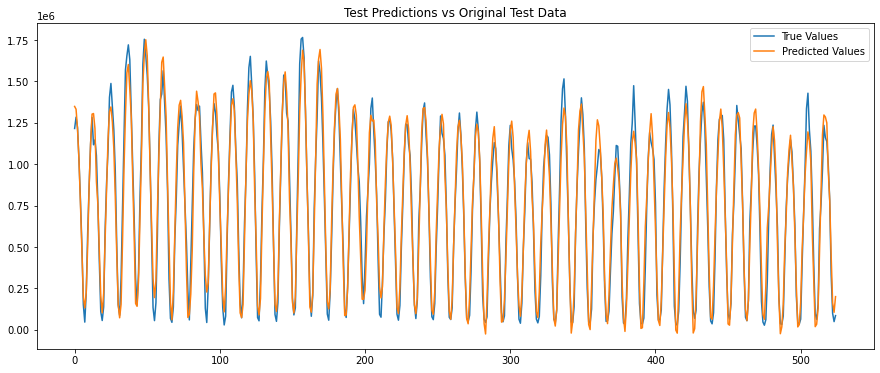

In [32]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()